In [97]:
import os
import docx
import datetime
from num2words import num2words
from dateutil.relativedelta import relativedelta
import pandas as pd
import openpyxl as opxl
import numpy as np
import matplotlib.pyplot as plt
from docx2pdf import convert

#os.chdir("files/")
doc = docx.Document('files/Template.docx')


def comma_separate(a):
    a = str(a)
    i = -1
    b = ''

    length = len(a)
    while length > 0:
        b = ',' + ''.join(reversed(a[i:i-3:-1]))  + b
        length -= 3
        i -= 3

    return b.strip(',')


def get_the_date(k):
    l = str(k)

    g = l[11:13]

    if g == '00':
        time = f"12{l[13:16]}am"

    elif  int(g)> 0 and int(g) < 12:
        time = f"{g}{l[13:16]}am"

    elif int(g) == 12:
        time = f"{g}{l[13:16]}pm"

    elif int(g)> 12:
        h = int(g)-12
        if h < 10:
            h = f"0{h}"
        time = f"{h}{l[13:16]}pm"
    else:
        pass

    if l[5:7] == '01':
        x = 'January'
    elif l[5:7] == '02':
        x = 'February'
    elif l[5:7] == '03':
        x = 'March'
    elif l[5:7] == '04':
        x = 'April'
    elif l[5:7] == '05':
        x = 'May'
    elif l[5:7] == '06':
        x = 'June'
    elif l[5:7] == '07':
        x = 'July'
    elif l[5:7] == '08':
        x = 'August'
    elif l[5:7] == '09':
        x = 'September'
    elif l[5:7] == '10':
        x = 'October'
    elif l[5:7] == '11':
        x = 'November'
    elif l[5:7] == '12':
        x = 'December'
    else:
        pass

    if l[9] == '1':
        y = 'st'
    elif l[9] == '2':
        y = 'nd'
    elif l[9] == '3':
        y = 'rd'
    else:
        y = 'th'

    if l[8:10] == '11' or l[8:10] == '12' or l[8:10] == '13':
        y = 'th'

    date = f"{l[8:10]}{y} of {x}, {l[0:4]}"
    
    return (time, date)


name = input("Please input investor's name:  ").upper().center(1)
capital = input("Please input capital invested in figures:  ").replace(',', '')
capital_words = str(num2words(int(capital))).replace('-', ' ').upper()
roi = int(int(capital) * 0.2 + int(capital))
roi_words = str(num2words(roi)).replace('-', ' ').upper()
date = get_the_date(datetime.datetime.now())
pay_date = get_the_date(datetime.datetime.now()+relativedelta(days = 30))
phone_number = input("Please input investor's phone number:  ")

for paragraph in doc.paragraphs:
    for run in paragraph.runs:
        if 'OLUREMI DANIEL YINKA' in run.text:
            run.text = run.text.replace('MR OLUREMI DANIEL YINKA', name)

        if '12th of February, 2020' in run.text:
            run.text = run.text.replace('12th of February, 2020', date[1])
            
        if '12th of March, 2020' in run.text:
            run.text = run.text.replace('12th of March, 2020', pay_date[1])
            
        if 'FIFTY THOUSAND NAIRA ONLY (N50,000)' in run.text:
            run.text = run.text.replace('FIFTY THOUSAND NAIRA ONLY (N50,000)', capital_words+ f" NAIRA ONLY (₦{comma_separate(capital)})")

        if 'SIXTY FIVE THOUSAND NAIRA ONLY (N65,000)' in run.text:
            run.text = run.text.replace('SIXTY FIVE THOUSAND NAIRA ONLY (N65,000)', roi_words+ f" NAIRA ONLY (₦{comma_separate(roi)})")
    
    
doc.save(f"files/{name + ' MOU'}.docx")
         

         
wb = opxl.load_workbook("files/Database.xlsx")
sheet = wb['Sheet1']
max_row = sheet.max_row
sheet.cell(max_row+1, 1).value = 'JI-'+str(int(sheet.cell(max_row, 1).value[3:]) + 1)

correction = [sheet.cell(max_row+1, 1).value, name, comma_separate(capital), ", ".join(date), 
              comma_separate(int(int(capital) * 0.2)), comma_separate(roi), pay_date[1], phone_number]
l = 0
for i in sheet.rows:
    if l == max_row:
        b = 0
        for cell in i: 
            cell.value = correction[b]
            b += 1
    else:
        l += 1
        
wb.save("files/Database.xlsx")
         
convert(f"files/{name + ' MOU'}.docx")
         
#df = pd.read_csv("New.csv")
#df.loc[df.index[-1]+1] = ['JI-'+str(int(df.iloc[-1][0][3:]) + 1), name, comma_separate(capital), 
#                          ", ".join(date), comma_separate(int(int(capital) * 0.2)), comma_separate(roi), pay_date[1]]
#df.to_csv('New.csv', index= False)


Please input investor's name:  Mr. ololani badmus
Please input capital invested in figures:  320000
Please input investor's phone number:  +234506754543


Here are a couple of things you can access:


How many investors have I had? (Input 1)
How much has been invested with me? (Input 2)
How much ROI has been generated totally? (Input 3)
Who is my biggest investor? (Input 4)
Show me some information about amounts invested over the months (Input 5)
Show me some information about the number of investors I've had over the months (Input 6)
Show me some information about the ROIs generated over the months (Input 7)

5


What year do you want to check?  2020


₦0.0 was invested in January
₦50,000 was invested in February
₦0.0 was invested in March
₦0.0 was invested in April
₦17,080,000 was invested in May
₦2,300,000 was invested in June
₦0.0 was invested in July
₦0.0 was invested in August
₦0.0 was invested in September
₦0.0 was invested in October
₦0.0 was invested in November
₦0.0 was invested in Decemeber

This image has been saved in your 'Investment_project' folder


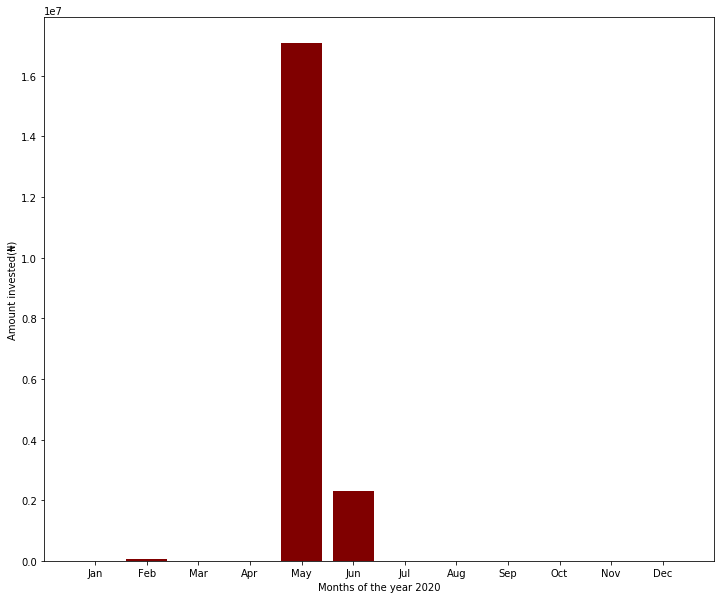

In [8]:
print("Here are a couple of things you can access:\n\n")
print("How many investors have I had? (Input 1)")
print("How much has been invested with me? (Input 2)")
print("How much ROI has been generated totally? (Input 3)")
print("Who is my biggest investor? (Input 4)")
print("Show me some information about amounts invested over the months (Input 5)")
print("Show me some information about the number of investors I've had over the months (Input 6)")
print("Show me some information about the ROIs generated over the months (Input 7)\n")
wb = opxl.load_workbook("files/Database.xlsx")
sheet = wb['Sheet1']
x = int(input())
print("\n")

def string_to_num(b):
    b = str(b)
    b = b.replace(',', '')
    return int(b)

df = pd.read_excel("files/Database.xlsx", skiprows=[x for x in range(0, 8)])
df["AMOUNT INVESTED(₦)"] = df["AMOUNT INVESTED(₦)"].apply(string_to_num)
df["ROI DUE(₦)"] = df["ROI DUE(₦)"].apply(string_to_num)
df["ROI + CAPITAL(₦)"] = df["ROI + CAPITAL(₦)"].apply(string_to_num)
capitals = np.array(df["AMOUNT INVESTED(₦)"])
rois = np.array(df["ROI DUE(₦)"])

if x == 5 or x == 6 or x == 7:
    year = input("What year do you want to check?  ").replace(' ', '')
    print("\n")
    
    def in_a_year(a):
        return a[-4:] == year
          
    a, b, c, d, e, f, g, h, i, j, k, l = ([], [], [], [], [], [], [], [], [], [], [], [])
    
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'Decemeber']

    lists = [a, b, c, d, e, f, g, h, i, j, k, l]
          
    

    new_df = df[df["TIME INVESTED"].apply(in_a_year)].reset_index().drop("index", axis = 1)

    m = 0
    for i in new_df["TIME INVESTED"]:
        for n, o in zip(months, lists):
            if n in i:
                o.append(new_df.loc[m]["AMOUNT INVESTED(₦)"])
        m+= 1


    
    a, b, c, d, e, f, g, h, i, j, k, l = ([], [], [], [], [], [], [], [], [], [], [], [])
    
    roilists = [a, b, c, d, e, f, g, h, i, j, k, l]
    roi_df = df[df["PAY DATE"].apply(in_a_year)].reset_index().drop("index", axis = 1)

    m = 0
    for i in new_df["PAY DATE"]:
        for n, o in zip(months, roilists):
            if n in i:
                o.append(new_df.loc[m]["ROI DUE(₦)"])
        m+= 1
        
        
        
if x == 1:
    print(f"You have had {sheet.cell(sheet.max_row, 1).value[3:]} investor(s)")
    
elif x == 2:
    print(f"{num2words(capitals.sum()).title()} Naira (₦{comma_separate(capitals.sum())})")

elif x == 3:
    print(f"{num2words(rois.sum()).title()} Naira (₦{comma_separate(rois.sum())})")
    
elif x == 4:
    a = list(capitals)
    index = a.index(max(a))
    print(f"{df.loc[index]['NAME']} with a capital of {num2words(a[index]).upper()} NAIRA (₦{comma_separate(a[index])})")

elif x == 5:      
    for n, o in zip(months, [np.sum(x) for x in lists]):
        print(f"₦{comma_separate(o)} was invested in {n}")

    plt.figure(figsize = (12,10))
    plt.bar([x[0:3] for x in months], [np.sum(x) for x in lists], color = (.5, 0, 0))
    plt.xlabel(f"Months of the year {year}")
    plt.ylabel("Amount invested(₦)") 
    #plt.title(f"Amount invested per month in the year {year}")

    plt.savefig("Investments_per_month.png")
    print("\nThis image has been saved in your 'Investment_project' folder")
          
elif x == 6:
    for n, o in zip(months, lists):
        print(f"{len(o)} investor(s) came in {n}")
    
    plt.figure(figsize = (12,10))
    plt.xlabel(f"Months of the year {year}")   
    plt.ylabel("Number of investors") 
    plt.bar([x[:3] for x in months], [len(x) for x in lists], color = (0, 0, 0))

    plt.savefig("Investors_per_month.png")
    print("\nThis image has been saved in your 'Investment_project' folder")
          
elif x == 7:
    for n, o in zip(months, [np.sum(x) for x in roilists]):
        print(f"₦{comma_separate(o)} was generated in {n}")

    plt.figure(figsize = (12,10))
    plt.bar([x[0:3] for x in months], [np.sum(x) for x in roilists], color = (0, 0, .5))
    plt.xlabel(f"Months of the year {year}")
    plt.ylabel("ROIs generated(₦)") 
    #plt.title(f"Amount generated per month in the year {year}")

    plt.savefig("ROI_per_month.png")
    print("\nThis image has been saved in your 'Investment_project' folder")

In [103]:
# Reminder script for when investment is due. I should try hosting it on some cloud platform or something

import datetime
import pandas as pd

def in_a_year_check(a):
        return a[-4:] == get_the_date(datetime.datetime.now())[1][-4:]


def get_the_date(k):
    l = str(k)

    g = l[11:13]

    if g == '00':
        time = f"12{l[13:16]}am"

    elif  int(g)> 0 and int(g) < 12:
        time = f"{g}{l[13:16]}am"

    elif int(g) == 12:
        time = f"{g}{l[13:16]}pm"

    elif int(g)> 12:
        h = int(g)-12
        if h < 10:
            h = f"0{h}"
        time = f"{h}{l[13:16]}pm"
    else:
        pass

    if l[5:7] == '01':
        x = 'January'
    elif l[5:7] == '02':
        x = 'February'
    elif l[5:7] == '03':
        x = 'March'
    elif l[5:7] == '04':
        x = 'April'
    elif l[5:7] == '05':
        x = 'May'
    elif l[5:7] == '06':
        x = 'June'
    elif l[5:7] == '07':
        x = 'July'
    elif l[5:7] == '08':
        x = 'August'
    elif l[5:7] == '09':
        x = 'September'
    elif l[5:7] == '10':
        x = 'October'
    elif l[5:7] == '11':
        x = 'November'
    elif l[5:7] == '12':
        x = 'December'
    else:
        pass

    if l[9] == '1':
        y = 'st'
    elif l[9] == '2':
        y = 'nd'
    elif l[9] == '3':
        y = 'rd'
    else:
        y = 'th'

    if l[8:10] == '11' or l[8:10] == '12' or l[8:10] == '13':
        y = 'th'

    date = f"{l[8:10]}{y} of {x}, {l[0:4]}"
    
    return (time, date)
    
    
df = pd.read_excel("files/Database.xlsx", skiprows=[x for x in range(0, 8)])
new_df = df[df["TIME INVESTED"].apply(in_a_year_check)].reset_index().drop("index", axis = 1)
new_df["AMOUNT INVESTED(₦)"] = new_df["AMOUNT INVESTED(₦)"].apply(string_to_num)
new_df["ROI DUE(₦)"] = new_df["ROI DUE(₦)"].apply(string_to_num)
new_df["ROI + CAPITAL(₦)"] = new_df["ROI + CAPITAL(₦)"].apply(string_to_num)
capitals = np.array(new_df["AMOUNT INVESTED(₦)"])
rois = np.array(new_df["ROI DUE(₦)"])

TWILIO_ACCOUNT_SID = 'ACbad3bf98ea7d52112b152e8d8222efb4'
TWILIO_AUTH_TOKEN = 'b8866b872d2950e651fadc1426463b5c'

client = Client(TWILIO_ACCOUNT_SID, TWILIO_AUTH_TOKEN)


number = 0
for i in new_df['PAY DATE']:
    if abs(int(i[:2]) - int(get_the_date(datetime.datetime.now())[1][:2])) <= 3:
        
        date = new_df.loc[number]["PAY DATE"]
        name = new_df.loc[number]["NAME"]
        phone_number = '+'+str(new_df.loc[number]["CONTACT"])
        fromm = 'whatsapp:+14155238886'
        to_me = 'whatsapp:+2347086643074'
        to_client = 'whatsapp:'+phone_number

        client.messages.create(body = f"Hello, Mr. Daniel.\nPlease be reminded that {name}'s payment will be due on the {date}. I will get back to you shortly with his payment option.", from_ = fromm, to = to_me)
        #client.messages.create(body = f"Hello, {name}.\nYour payment will be due on the {date}.\n\nHow do you want payment? (Please reply with the method you want)\n*Method 1*- ROI alone\n*Method 2*- ROI + Principal\n*Method 3*- Reinvest the total sum.", from_ = fromm, to = to_client)
    
    number += 1
    
#It will read from several months. Fix that.
#If humanize paydate  == a month from now, then run this code. -- I

ConnectionError: HTTPSConnectionPool(host='api.twilio.com', port=443): Max retries exceeded with url: /2010-04-01/Accounts/ACbad3bf98ea7d52112b152e8d8222efb4/Messages.json (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000000000D8F3BA8>: Failed to establish a new connection: [Errno 11004] getaddrinfo failed'))

In [126]:
import humanize

humanize.naturaltime(datetime.date.today() - datetime.date(2020, 5, 5))

'a month ago'

In [133]:
' '.join('12th of March, 2020'.replace('th', '').replace('rd', '').replace('st', '').replace(',', '').replace('of', '').split())

'12 March 2020'

In [138]:
reverse('12 March 2020'.split())


NameError: name 'reverse' is not defined

In [79]:
df

,ID,NAME,AMOUNT INVESTED(₦),TIME INVESTED,ROI DUE(₦),ROI + CAPITAL(₦),PAY DATE,CONTACT
0,JI-1,MR. OLUREMI DANIEL YINKA,"50,000","12.32pm, 12th of February, 2020","10,000","60,000","12th of March, 2020",2347086643074
1,JI-2,MRS. BUKUNOLA OLAYIMIKA AJAYI,"2,500,000","08:04pm, 15th of May, 2020","500,000","3,000,000","15th of June, 2020",2347086643074
2,JI-3,MR. OSHIOKE IGHADARO,"5,000,000","08:04pm, 15th of May, 2020","1,000,000","6,000,000","15th of June, 2020",2347086643074
3,JI-4,MR. BLESSING AKAH,"500,000","08:05pm, 15th of May, 2020","100,000","600,000","15th of June, 2020",2347086643074
4,JI-5,MRS. GBEMISOLA FRIDOUZ WEALTH,"1,200,000","08:06pm, 15th of May, 2020","240,000","1,440,000","15th of June, 2020",2347086643074
5,JI-6,MRS. OLUREMI WURAOLA,"2,500,000","08:06pm, 15th of May, 2020","500,000","3,000,000","15th of June, 2020",2347086643074
6,JI-7,MRS. INDEFREKE BOLU,"240,000","07:42pm, 17th of May, 2020","48,000","288,000","17th of June, 2020",2347086643074
7,JI-8,MR. SHEKAU BUHARI,"200,000","07:08pm, 18th of May, 2020","40,000","240,000","18th of June, 2020",2347086643074
8,JI-9,MRS. OTUTU GEORGINA,"500,000","08:19pm, 21st of May, 2020","100,000","600,000","21st of June, 2020",2347086643074
9,JI-10,MR. OLUWABUBA VICTOR,"120,000","03:35am, 23rd of May, 2020","24,000","144,000","23rd of June, 2020",2347086643074


In [76]:
JI-12

'2020'

In [61]:
df

,ID,NAME,AMOUNT INVESTED(₦),TIME INVESTED,ROI DUE(₦),ROI + CAPITAL(₦),PAY DATE
0,JI-1,MR. OLUREMI DANIEL YINKA,50000,"12.32pm, 12th of February, 2020",10000,60000,"12th of March, 2020"
1,JI-2,MRS. BUKUNOLA OLAYIMIKA AJAYI,2500000,"08:04pm, 15th of May, 2020",500000,3000000,"15th of June, 2020"
2,JI-3,MR. OSHIOKE IGHADARO,5000000,"08:04pm, 15th of May, 2020",1000000,6000000,"15th of June, 2020"
3,JI-4,MR. BLESSING AKAH,500000,"08:05pm, 15th of May, 2020",100000,600000,"15th of June, 2020"
4,JI-5,MRS. GBEMISOLA FRIDOUZ WEALTH,1200000,"08:06pm, 15th of May, 2020",240000,1440000,"15th of June, 2020"
5,JI-6,MRS. OLUREMI WURAOLA,2500000,"08:06pm, 15th of May, 2020",500000,3000000,"15th of June, 2020"
6,JI-7,MRS. INDEFREKE BOLU,240000,"07:42pm, 17th of May, 2020",48000,288000,"17th of June, 2020"
7,JI-8,MR. SHEKAU BUHARI,200000,"07:08pm, 18th of May, 2020",40000,240000,"18th of June, 2020"
8,JI-9,MRS. OTUTU GEORGINA,500000,"08:19pm, 21st of May, 2020",100000,600000,"21st of June, 2020"
9,JI-10,MR. OLUWABUBA VICTOR,120000,"03:35am, 23rd of May, 2020",24000,144000,"23rd of June, 2020"


In [19]:
#Zamzar 

import requests
from requests.auth import HTTPBasicAuth

api_key = 'a9681b952523296ad0d37ccd5fe7bf42a51527be'
endpoint = "https://sandbox.zamzar.com/v1/jobs"

source_file = "files/MR. DANIEL BODAFI MOU.docx"
target_format = "pdf"

file_content = {'source_file': open(source_file, 'rb')}
data_content = {'target_format': target_format}
res = requests.post(endpoint, data=data_content, files=file_content, auth=HTTPBasicAuth(api_key, ''))
print(res.json())


job_id = 15
endpoint = "https://sandbox.zamzar.com/v1/jobs/{}".format(job_id)

resp = requests.get(endpoint, auth=HTTPBasicAuth(api_key, ''))


file_id = 3
local_filename = 'files/MR. DANIEL BODAFI MOU.pdf'
endpoint = "https://sandbox.zamzar.com/v1/files/{}/content".format(file_id)

response = requests.get(endpoint, stream=True, auth=HTTPBasicAuth(api_key, ''))

try:
    with open(local_filename, 'wb') as f:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                f.write(chunk)
                f.flush()

    print("File downloaded")

except IOError:
    print("Error")

In [9]:
# ConvertAPI


import convertapi
convertapi.api_secret = 'j4Yai85q2QIC94bk'
result = convertapi.convert('pdf', {'File': 'files/MR. DANIEL BODAFI MOU.docx'})
result.file.save('files/MR. DANIEL BODAFI MOU capi.pdf')

'files/MR. DANIEL BODAFI MOU capi.pdf'

In [28]:
dir("i")

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',


In [62]:
# Sending a whatsapp message

from twilio.rest import Client
client = Client()

fromm = 'whatsapp:+14155238886'
to = 'whatsapp:+2347086643074'

client.messages.create(body = "Heyyyy", from_ = fromm, to = to)


'# Sending a whatsapp message\n\nfrom twilio.rest import Client\nclient = Client()\n\nfromm = \'whatsapp:+14155238886\'\nto = \'whatsapp:+2347086643074\'\n\nclient.messages.create(body = "Heyyyy", from_ = fromm, to = to)'

In [ ]:
# Saving to JsON temporarily

if os.path.isfile("files/approved_investor.json") and os.stat("files/approved_investor.json").st_size != 0:
    old_file = open("files/approved_investor.json", "r+")
    data = json.loads(old_file.read())
    data['investor_detail'] = input("The investor details please ")
else:
    old_file = open("files/approved_investor.json", "w+")
    data = {'investor_detail': '+2347086643074, 150000'}
    
old_file.seek(0)
old_file.write(json.dumps(data))
